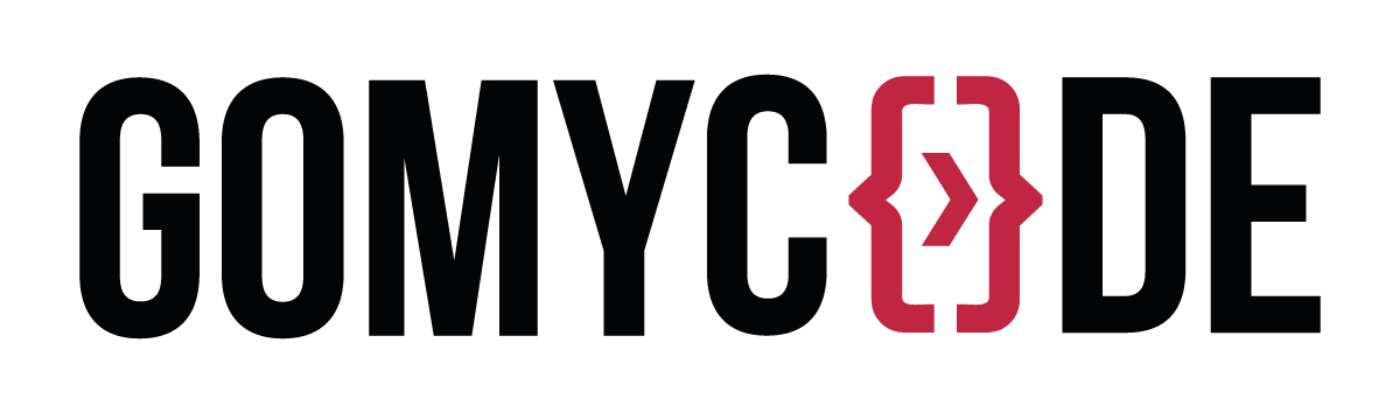

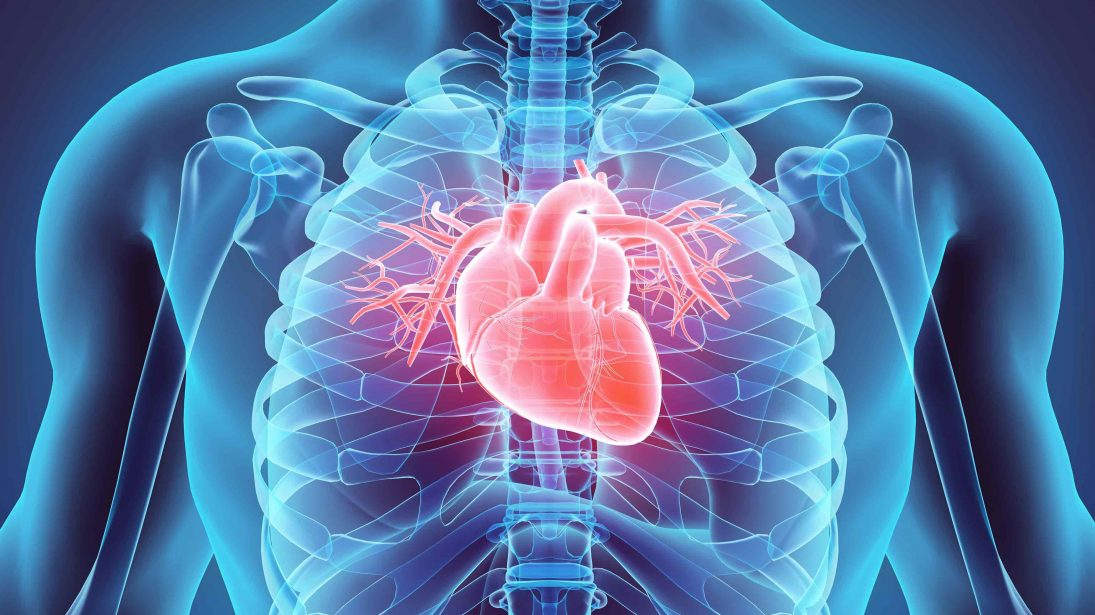

# Final Project - Heart Storke

## Context

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Content

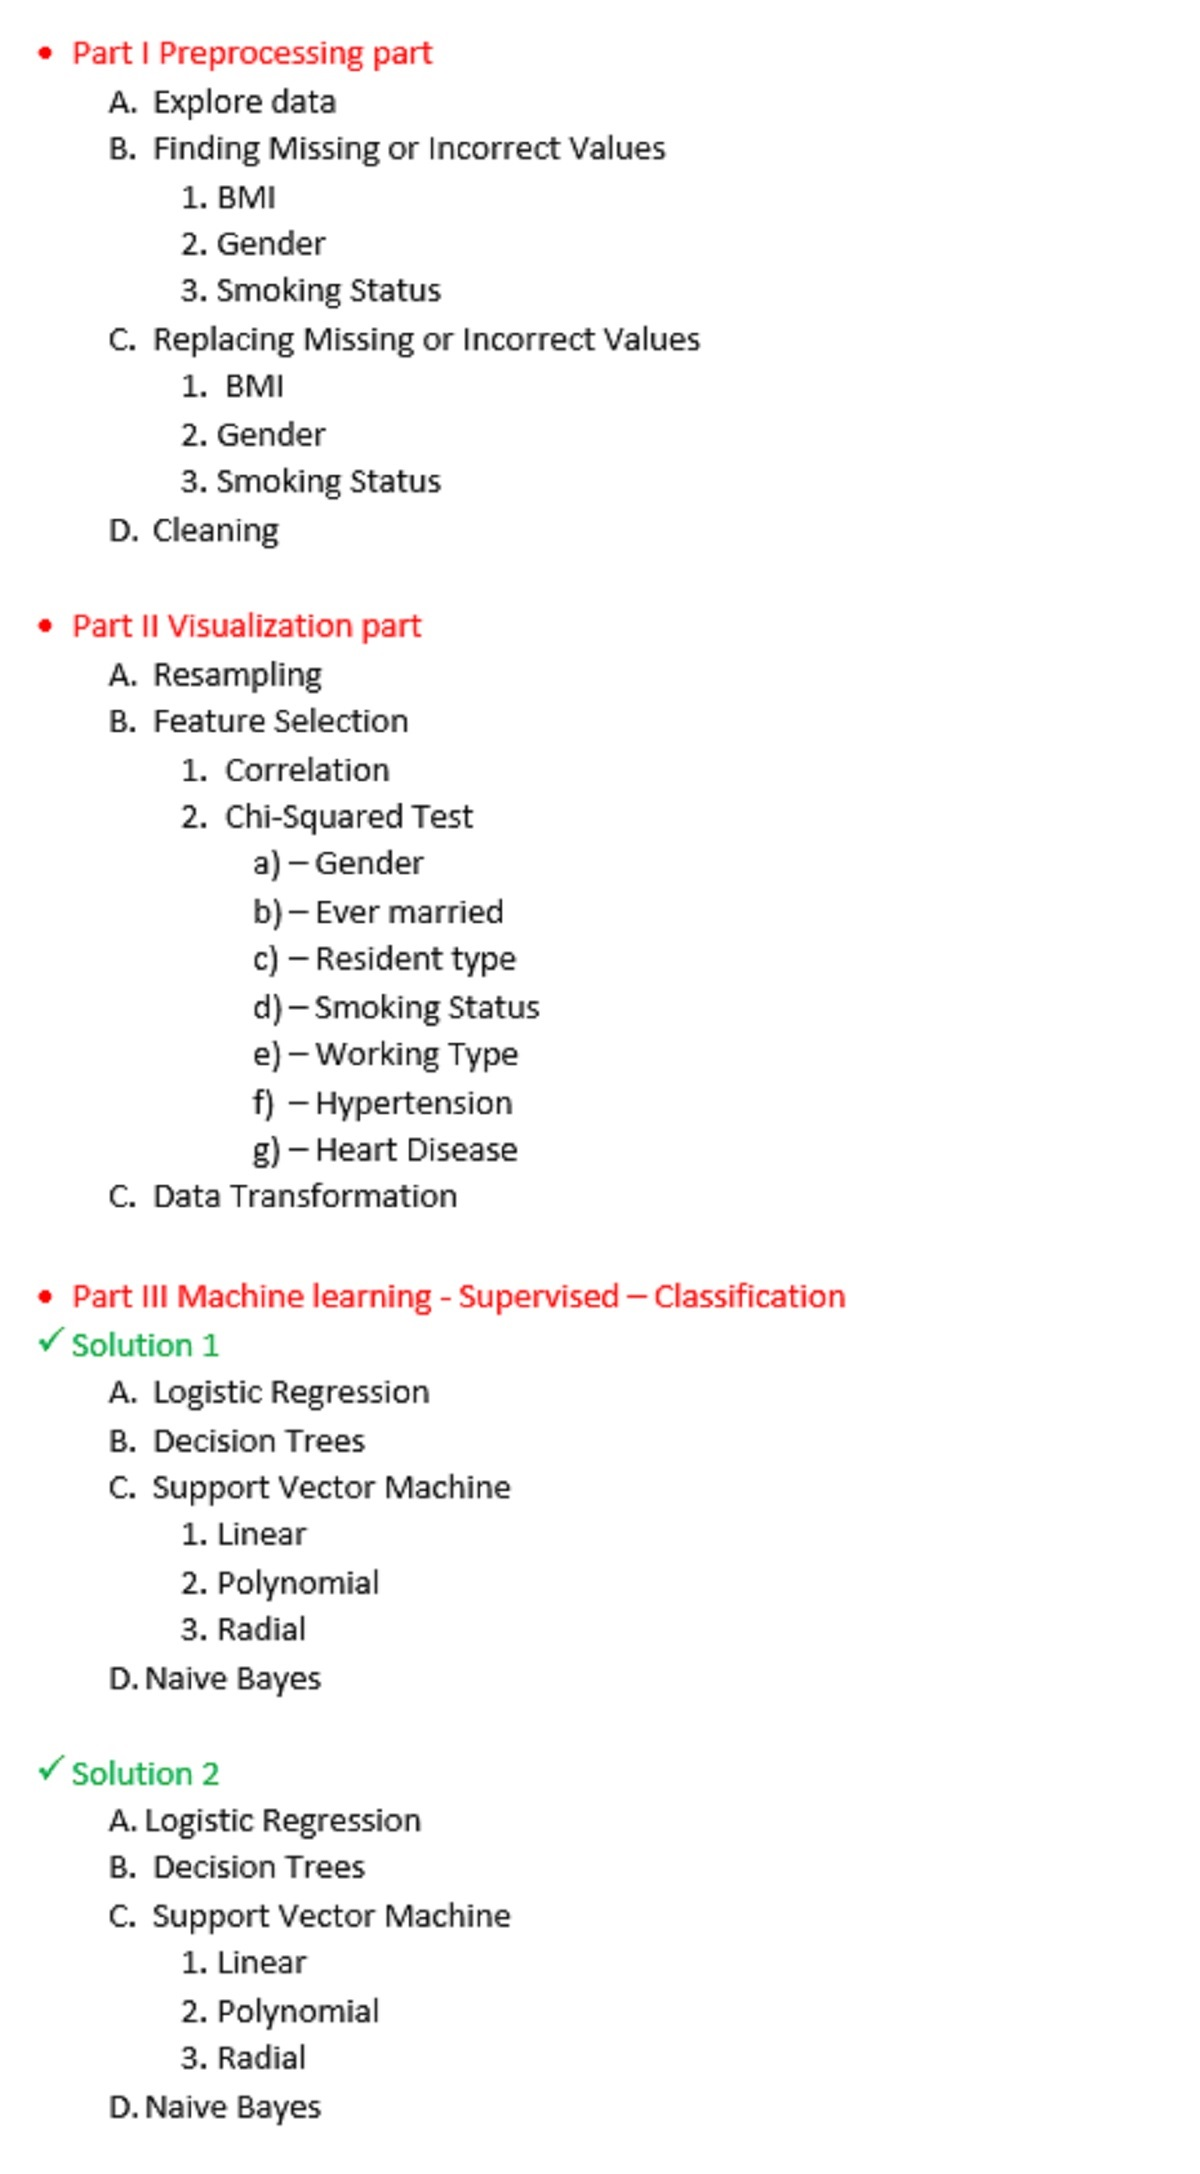

### Inputs / Features

<ol>
<li> Id : Unique identifier of the patient</li>
<li> Gender : "Male", "Female"</li>
<li> Age : Age of the patient</li>
<li> Hypertension : 0 if the patient doesn't have Hypertension, 1 if the patient has Hypertension</li>
<li> Heart_disease : 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease</li>
<li> Ever_married : "No" or "Yes"</li>
<li> Work_type : "Children", "Govt_jov", "Never_worked", "Private" or "Self_employed"</li>
<li> Residence_type : "Rural" or "Urban"</li>
<li> Avg_glucose_level : Average glucose level in blood</li>
<li> BMI : Body Mass Index</li>
<li> Smoking_status : "Formerly Smoked", "Never Smoked" or "Smokes" </li>
</ol>
    
### Output / Target
    
Stroke : 1 if the patient had a stroke or 0 if not (Target)


---

# Part I : Preprocessing part

### A - Explore Data 

---

In [144]:
#Import Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'


In [145]:
#Reading File
data = pd.read_csv(r'heart_strokes.csv')

#Put it in DataFrame
data_frame = pd.DataFrame(data)

#Display data
data_frame.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [146]:
#Data Length
data_frame.shape

(43400, 12)

- We have 43400 Patients and 12 Attributes

In [147]:
#Data description
data_frame.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [148]:
#Display first 10 lines
data_frame.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [149]:
#Display last 10 lines
data_frame.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43390,10096,Female,69.0,0,0,Yes,Self-employed,Urban,229.85,31.2,never smoked,0
43391,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0
43392,45266,Female,18.0,0,0,No,Private,Urban,131.96,22.8,NaN,0
43393,69344,Male,39.0,0,0,Yes,Private,Rural,132.22,31.6,never smoked,0
43394,52380,Male,47.0,0,0,No,Govt_job,Urban,68.52,25.2,formerly smoked,0
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [150]:
#Columns info
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


---

### B - Finding Missing or incorrect Values

---

* Let's check now for missing values.

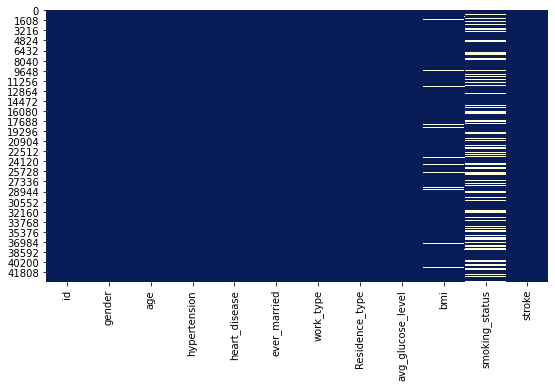

In [151]:
#Finding Missing Values

fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(data_frame.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

* We can see that BMI and smoking_status is missing for few patients

In [152]:
#Counting missing values
data_frame.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

- BMI data missing in 3.31% Cases and Smoking Status missing in 30.71% Cases.

### 1. BMI

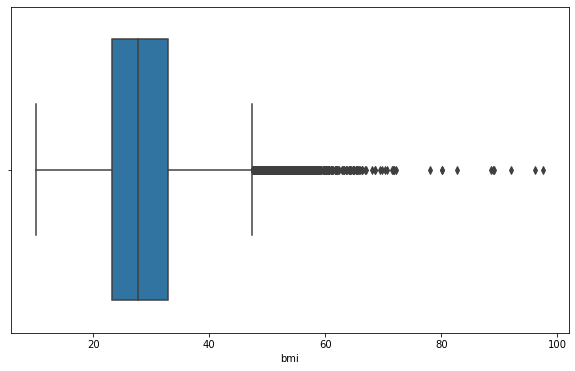

In [153]:
#Plotting BMI

fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data=data_frame, x='bmi')
plt.show()

In [154]:
data_frame['bmi'].value_counts()

27.7    271
27.6    267
26.8    266
26.1    265
27.1    260
       ... 
10.1      1
67.0      1
11.2      1
97.6      1
65.2      1
Name: bmi, Length: 555, dtype: int64

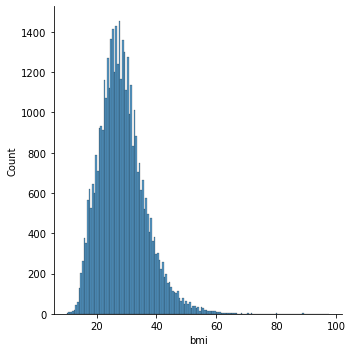

In [155]:
#Plotting Minimum Payments
sns.displot(data_frame['bmi'])
plt.show()

### 2. Gender

In [156]:
#counting 'Gender'
data_frame.gender.value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

### 3. Smoking_Status

In [157]:
#Counting 'smoking_status'
data_frame['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

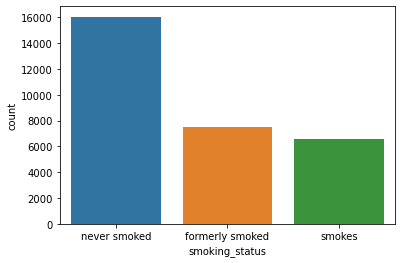

In [158]:
# Plotting 'smoking_status'
ax = sns.countplot(x="smoking_status", data=data_frame)

---

### C - Replacing Missing or Incorrect Values

---

### 1. BMI

In [159]:
#Replace Nan Values
data_frame['bmi'].fillna(data_frame['bmi'].mean(),inplace=True)

In [160]:
#Counting missing values
data_frame.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

### 2. Gender

In [161]:
#Replace 'Other' by 'Female'
data_frame['gender'].replace(['Other'],'Female',inplace=True)

In [162]:
#Counting 'Gender'
data_frame['gender'].value_counts()

Female    25676
Male      17724
Name: gender, dtype: int64

### 3. Smoking_Status

In [163]:
#Clean DataFrame
clean_df = data_frame.dropna(axis = 0)
clean_df.shape

(30108, 12)

In [164]:
#Dirty DataFrame
nan_df = data_frame[data_frame.isna().any(axis=1)]
nan_df.shape


(13292, 12)

In [165]:
#Reset Index
nan_df.reset_index(drop=True, inplace=True)
nan_df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
2,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
3,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
4,10460,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13287,35179,Female,9.0,0,0,No,children,Urban,68.49,16.8,NaN,0
13288,5366,Female,66.0,0,0,Yes,Self-employed,Urban,92.10,24.8,NaN,0
13289,30759,Male,14.0,0,0,No,children,Urban,82.48,24.8,NaN,0
13290,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,NaN,0


In [166]:
nan_df['smoking_status'].isnull().sum()

13292

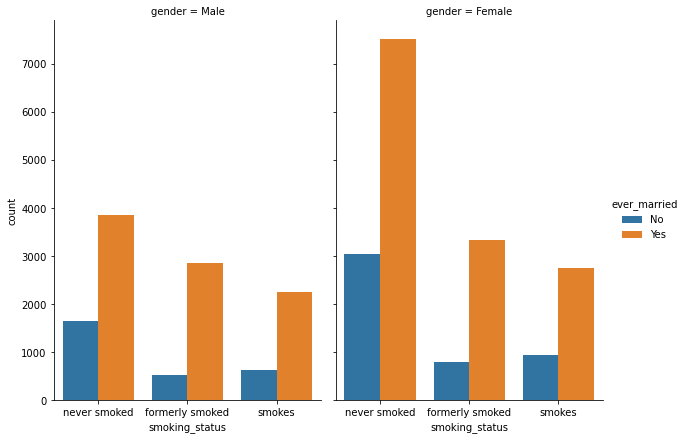

In [167]:
g = sns.catplot(x="smoking_status", hue="ever_married", col="gender",
                data=data_frame, kind="count",
                height=6, aspect=.7);

In [168]:
# Setting the new value
nan_df.loc[(nan_df.gender == 'Female') & (nan_df.ever_married == 'Yes') , 'smoking_status' ] = "never smoked"


In [169]:
# Setting the new value
nan_df.loc[(nan_df.gender == 'Male') & (nan_df.ever_married == 'Yes') , 'smoking_status' ] = "formerly smoked"

In [170]:
nan_df['smoking_status'].value_counts()

never smoked       3248
formerly smoked    2139
Name: smoking_status, dtype: int64

In [171]:
nan_df['smoking_status'].isnull().sum()

7905

In [172]:
pd.crosstab( clean_df["work_type"], clean_df["smoking_status"],
            margins = True).style.background_gradient(cmap = "summer_r")

smoking_status,formerly smoked,never smoked,smokes,All
work_type,,,,
Govt_job,1091,2291,964,4346
Never_worked,9,85,7,101
Private,4629,10452,4504,19585
Self-employed,1660,2707,1078,5445
children,104,518,9,631
All,7493,16053,6562,30108


In [173]:
# Setting the new value
nan_df.loc[nan_df.work_type == 'children' , 'smoking_status' ] = "never smoked"

In [174]:
pd.crosstab( [clean_df["heart_disease"],clean_df["gender"]], clean_df["smoking_status"],
            margins = True).style.background_gradient(cmap = "summer_r")



In [175]:
# Setting the new value
nan_df.loc[(nan_df.gender == 'Male') & (nan_df.heart_disease == 1) , 'smoking_status' ] = "formerly smoked"

In [176]:
pd.crosstab( [clean_df["stroke"],clean_df["gender"]],
            clean_df["smoking_status"], margins = True).style.background_gradient(cmap = "summer_r")

In [177]:
# Setting the new value
nan_df.loc[(nan_df.gender == 'Male') & (nan_df.stroke == 1) , 'smoking_status' ] = "formerly smoked"

In [178]:
nan_df['smoking_status'].isnull().sum()

2361

In [179]:
nan_df['smoking_status'].fillna("never smoked", inplace=True)
nan_df['smoking_status'].isnull().sum()

0

In [180]:
nan_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
2,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
3,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,never smoked,0
4,10460,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13287,35179,Female,9.0,0,0,No,children,Urban,68.49,16.8,never smoked,0
13288,5366,Female,66.0,0,0,Yes,Self-employed,Urban,92.10,24.8,never smoked,0
13289,30759,Male,14.0,0,0,No,children,Urban,82.48,24.8,never smoked,0
13290,30077,Male,6.0,0,0,No,children,Urban,77.48,19.1,never smoked,0


In [181]:
#concat two dataframe
data_frame = pd.concat([nan_df, clean_df])


In [39]:
data_frame.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

---

### D - Cleaning

---

In [40]:
#drop 'id'
data_frame.drop('id', axis = 1, inplace=True)
data_frame.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
2,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
3,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,never smoked,0
4,Female,79.0,0,0,Yes,Govt_job,Urban,77.08,35.0,never smoked,0


---

# Part II : Visualization Part

---

### A - Resampling

---

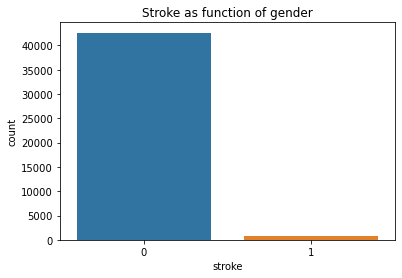

In [41]:
sns.countplot(x='stroke', data=data_frame)
plt.title("Stroke as function of gender")
plt.show()

In [42]:
data_frame['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

---

- As we can see in the plot below, our dataset is imbalanced and it's one of the common issues found in datasets that are used for classification (target = categorical).
- To solve the class imbalance problem, we can deal by using Resampling (Oversampling and Undersampling) technique.

### Under - Sampling

- Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. 

### Over - Sampling

- Oversampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. 

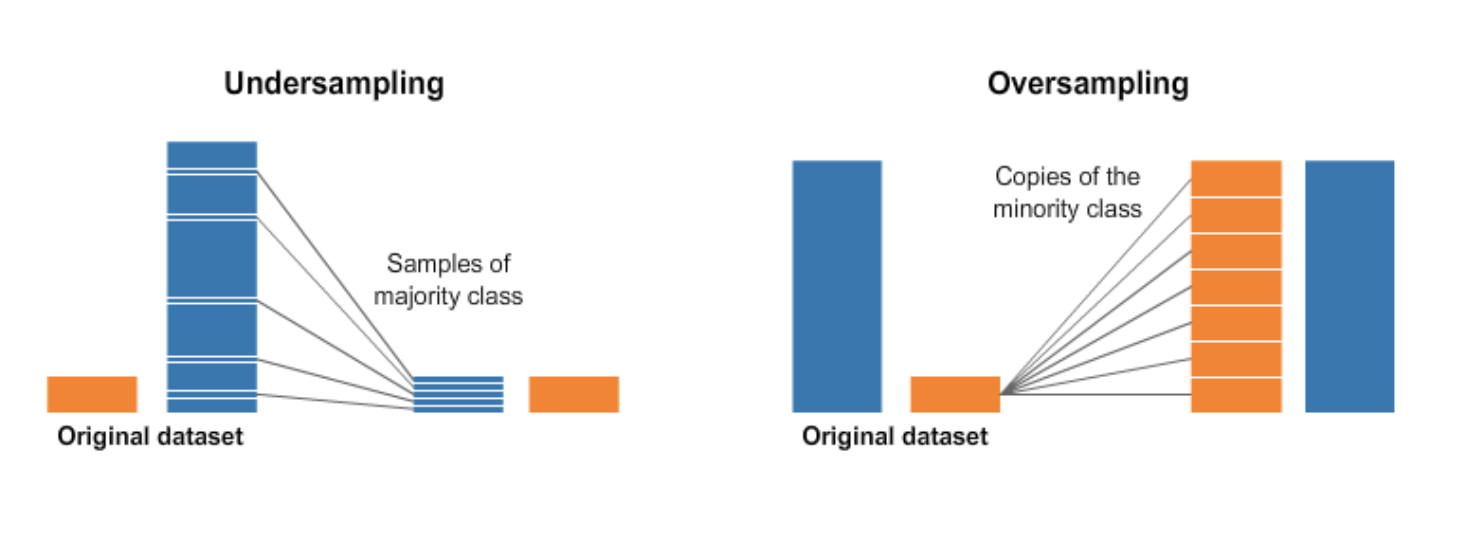

---

- In our case, it's better to use Undersampling because we have sufficient quatity of data.

In [43]:
#Shuffle the Dataset
data_frame = data_frame.sample(frac=1,random_state=4)

#Patient get stroke
get_stroke_df = data_frame.loc[data_frame['stroke'] == 1]

#Sample without getting stroke
non_stroke_df = data_frame.loc[data_frame['stroke'] == 0].sample(n=1000,random_state=42)

#concat two data frame
new_data_frame = pd.concat([get_stroke_df,non_stroke_df])

new_data_frame


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4700,Female,80.0,0,1,Yes,Private,Rural,78.90,28.605038,never smoked,1
37088,Male,79.0,0,0,Yes,Self-employed,Rural,222.21,32.700000,formerly smoked,1
31594,Male,75.0,0,0,Yes,Private,Rural,76.08,28.605038,formerly smoked,1
41626,Female,56.0,0,0,Yes,Private,Urban,179.19,29.400000,smokes,1
7985,Female,71.0,0,0,Yes,Govt_job,Urban,263.32,38.700000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
21247,Female,54.0,0,0,Yes,Private,Urban,84.77,46.900000,never smoked,0
4358,Female,48.0,0,0,No,Private,Urban,63.40,22.800000,never smoked,0
23866,Female,31.0,0,0,No,Private,Rural,80.15,22.900000,formerly smoked,0
24038,Female,51.0,0,0,Yes,Private,Urban,215.29,23.700000,formerly smoked,0


In [44]:
#Reset Index
new_data_frame.reset_index(drop=True, inplace=True)
new_data_frame.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,80.0,0,1,Yes,Private,Rural,78.90,28.605038,never smoked,1
1,Male,79.0,0,0,Yes,Self-employed,Rural,222.21,32.700000,formerly smoked,1
2,Male,75.0,0,0,Yes,Private,Rural,76.08,28.605038,formerly smoked,1
3,Female,56.0,0,0,Yes,Private,Urban,179.19,29.400000,smokes,1
4,Female,71.0,0,0,Yes,Govt_job,Urban,263.32,38.700000,never smoked,1


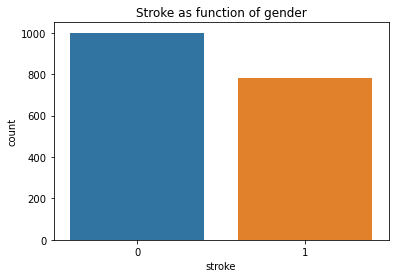

In [45]:
sns.countplot(x='stroke', data=new_data_frame)
plt.title("Stroke as function of gender")
plt.show()

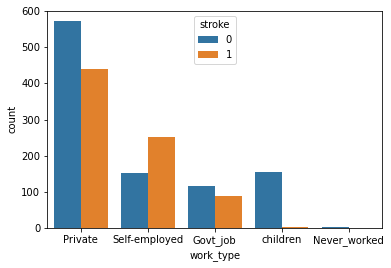

In [46]:
#Distribution between Work Type and Stroke

sns.countplot(x="work_type",  hue="stroke", data = new_data_frame)
plt.show()

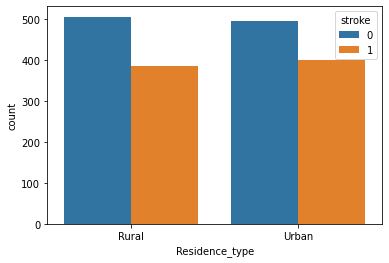

In [47]:
#Distribution between Residence_type and Stroke

sns.countplot(x="Residence_type",  hue="stroke", data = new_data_frame)
plt.show()

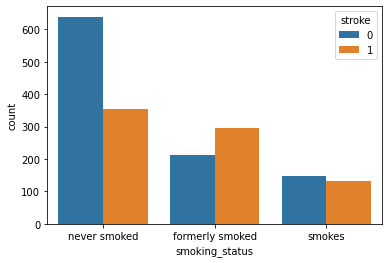

In [48]:
#Distribution between smoking_status and Stroke

sns.countplot(x="smoking_status",  hue="stroke", data = new_data_frame)
plt.show()

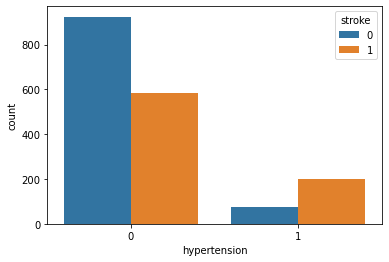

In [49]:
#Distribution between smoking_status and Stroke

sns.countplot(x="hypertension",  hue="stroke", data = new_data_frame)
plt.show()

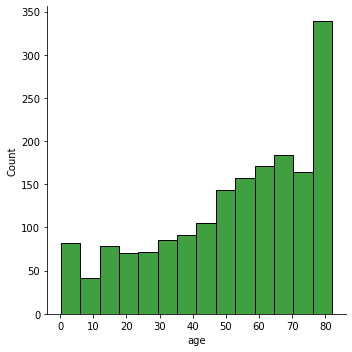

In [50]:
#'Age' Distribution with Histogram seaborn

sns.displot(new_data_frame['age'], kind='hist', color='green')
plt.show()

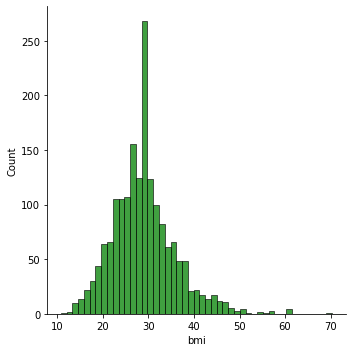

In [51]:
#'bmi' Distribution with Histogram seaborn

sns.displot(new_data_frame['bmi'], kind='hist', color='green')
plt.show()

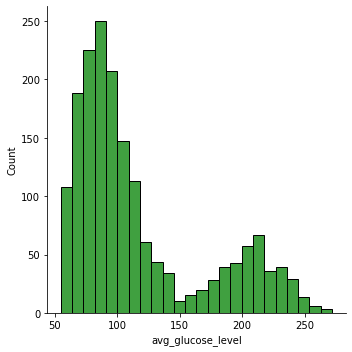

In [52]:
#'avg_glucose_level' Distribution with Histogram seaborn

sns.displot(new_data_frame['avg_glucose_level'], kind='hist', color='green')
plt.show()

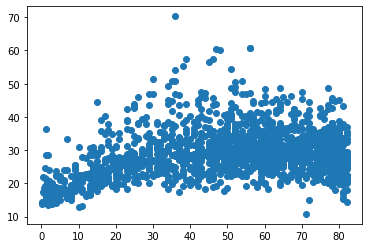

In [53]:
plt.scatter(x='age', y='bmi',data=new_data_frame)

---

### B - Feature Selection

---

### 1 - Correlation

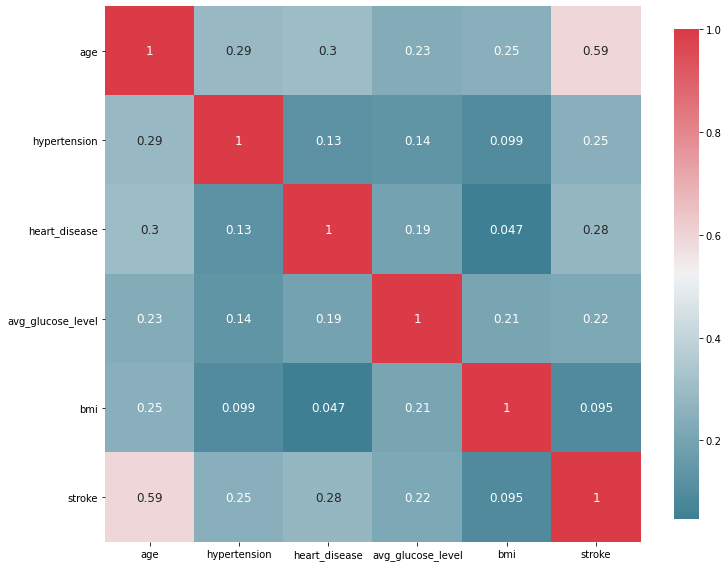

In [54]:
#Correlation
corr = new_data_frame.corr()
s , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
s = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = 
                    { 'fontsize' : 12 } )

- This graph display the pairwise correlation of all numeric data type columns in the dataframe.
- So, we can conclude that all the features are important to build the ML model.

---

### 2 - Chi - Squared

In [55]:
from scipy import stats

####  a - Gender

- Is there any relationship between patient who have stroked to Gender of the patient?

In [56]:
new_data_frame['gender'].value_counts()

Female    1006
Male       777
Name: gender, dtype: int64

In [57]:
#Crosstab 
stroke_gender_ct = pd.crosstab(index = new_data_frame['gender'], columns = new_data_frame['stroke'])
stroke_gender_ct

stroke,0,1
gender,,
Female,575,431
Male,425,352


In [58]:
stroke_gender_ct.iloc[:].values

array([[575, 431],
       [425, 352]], dtype=int64)

In [59]:

(chi2, p, dof,_) = stats.chi2_contingency([stroke_gender_ct.iloc[:].values])

print("chi2          : " ,chi2)
print("p-value     : " ,p)
print("Degree of freedom  : " ,dof)

chi2          :  0.9791773238662044
p-value     :  0.3224019960702573
Degree of freedom  :  1


- The Gender feature have P-value more than 0.05 that's mean this feature is not statistically significant.

---

####  b - Ever married

- Is there any relationship between patient who have stroked to the patient who ever married?

In [60]:
new_data_frame['ever_married'].value_counts()

Yes    1316
No      467
Name: ever_married, dtype: int64

In [61]:
#Crosstab 
stroke_ever_married_ct = pd.crosstab(index = new_data_frame['ever_married'], columns = new_data_frame['stroke'])
stroke_ever_married_ct

stroke,0,1
ever_married,,
No,387,80
Yes,613,703


In [62]:
stroke_ever_married_ct.iloc[:].values

array([[387,  80],
       [613, 703]], dtype=int64)

In [63]:

(chi2, p, dof,_) = stats.chi2_contingency([stroke_ever_married_ct.iloc[:].values])

print("chi2          : " ,chi2)
print("p-value     : " ,p)
print("Degree of freedom  : " ,dof)

chi2          :  182.8223509597209
p-value     :  1.172768956410198e-41
Degree of freedom  :  1


- The 'Ever_married' feature have P-value less than 0.05 that's mean this feature is statistically significant.

---

####  c - Residence Type

- Is there any relationship between patient who have stroked to the Residence Type?

In [64]:
new_data_frame['Residence_type'].value_counts()

Urban    894
Rural    889
Name: Residence_type, dtype: int64

In [65]:
#Crosstab 
stroke_residence_type_ct = pd.crosstab(index = new_data_frame['Residence_type'], columns = new_data_frame['stroke'])
stroke_residence_type_ct

stroke,0,1
Residence_type,,
Rural,505,384
Urban,495,399


In [66]:

(chi2, p, dof,_) = stats.chi2_contingency([stroke_residence_type_ct.iloc[:].values])

print("chi2          : " ,chi2)
print("p-value     : " ,p)
print("Degree of freedom  : " ,dof)

chi2          :  0.3173004676225567
p-value     :  0.5732344993320927
Degree of freedom  :  1


- The 'Residence_type' feature have P-value more than 0.05 that's mean this feature is not statistically significant.

---

####  d - Smoking Status

- Is there any relationship between patient who have stroked to the Smoking status?

In [67]:
new_data_frame['smoking_status'].value_counts()

never smoked       994
formerly smoked    508
smokes             281
Name: smoking_status, dtype: int64

In [68]:
#Crosstab 
stroke_smoking_status_ct = pd.crosstab(index = new_data_frame['smoking_status'], columns = new_data_frame['stroke'])
stroke_smoking_status_ct

stroke,0,1
smoking_status,,
formerly smoked,213,295
never smoked,639,355
smokes,148,133


In [69]:
stroke_smoking_status_ct.iloc[:].values

array([[213, 295],
       [639, 355],
       [148, 133]], dtype=int64)

In [70]:

(chi2, p, dof,_) = stats.chi2_contingency([stroke_smoking_status_ct.iloc[:].values])

print("chi2          : " ,chi2)
print("p-value     : " ,p)
print("Degree of freedom  : " ,dof)

chi2          :  69.80374660719589
p-value     :  6.95519028397072e-16
Degree of freedom  :  2


- The 'Smoking Status' feature have P-value less than 0.05 that's mean this feature is statistically significant.

---

####  e - Work type

- Is there any relationship between patient who have stroked to the working type?

In [71]:
new_data_frame['work_type'].value_counts()

Private          1014
Self-employed     403
Govt_job          205
children          157
Never_worked        4
Name: work_type, dtype: int64

In [72]:
#Crosstab 
stroke_working_type_ct = pd.crosstab(index = new_data_frame['work_type'], columns = new_data_frame['stroke'])
stroke_working_type_ct

stroke,0,1
work_type,,
Govt_job,116,89
Never_worked,4,0
Private,573,441
Self-employed,152,251
children,155,2


In [73]:
stroke_working_type_ct.iloc[:].values

array([[116,  89],
       [  4,   0],
       [573, 441],
       [152, 251],
       [155,   2]], dtype=int64)

In [74]:

(chi2, p, dof,_) = stats.chi2_contingency([stroke_working_type_ct.iloc[:].values])

print("chi2          : " ,chi2)
print("p-value     : " ,p)
print("Degree of freedom  : " ,dof)

chi2          :  174.33380707428867
p-value     :  1.2280056858553836e-36
Degree of freedom  :  4


- The 'Working Type' feature have P-value less than 0.05 that's mean this feature is statistically significant.

---

####  f - Hypertension

- Is there any relationship between patient who have stroked to the patient who have hypertension?

In [75]:
new_data_frame['hypertension'].value_counts()

0    1507
1     276
Name: hypertension, dtype: int64

In [76]:
#Crosstab 
stroke_hypertension_ct = pd.crosstab(index = new_data_frame['hypertension'], columns = new_data_frame['stroke'])
stroke_hypertension_ct

stroke,0,1
hypertension,,
0,924,583
1,76,200


In [77]:

(chi2, p, dof,_) = stats.chi2_contingency([stroke_hypertension_ct.iloc[:].values])

print("chi2          : " ,chi2)
print("p-value     : " ,p)
print("Degree of freedom  : " ,dof)

chi2          :  106.69429406817687
p-value     :  5.194199962733631e-25
Degree of freedom  :  1


- The 'Hypertension' feature have P-value less than 0.05 that's mean this feature is statistically significant.

---

####  g - Heart Disease

- Is there any relationship between patient who have stroked to the patient who have heart disease?

In [78]:
new_data_frame['heart_disease'].value_counts()

0    1564
1     219
Name: heart_disease, dtype: int64

In [79]:
#Crosstab 
stroke_heart_disease_ct = pd.crosstab(index = new_data_frame['heart_disease'], columns = new_data_frame['stroke'])
stroke_heart_disease_ct

stroke,0,1
heart_disease,,
0,958,606
1,42,177


In [80]:

(chi2, p, dof,_) = stats.chi2_contingency([stroke_heart_disease_ct.iloc[:].values])

print("chi2          : " ,chi2)
print("p-value     : " ,p)
print("Degree of freedom  : " ,dof)

chi2          :  136.37388663326345
p-value     :  1.6528483823628203e-31
Degree of freedom  :  1


- The 'Heart Disease' feature have P-value less than 0.05 that's mean this feature is statistically significant.

---

### Summary

- Gender is not statistically significant.
- Ever married is statistically significant.
- Resident type is not statistically significant.
- Smoking Status is statistically significant.
- Working Type is statistically significant.
- Hypertension is statistically significant.
- Heart Disease is statistically significant.

### C - Data Transformation

---

In [81]:
new_data_frame

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,80.0,0,1,Yes,Private,Rural,78.90,28.605038,never smoked,1
1,Male,79.0,0,0,Yes,Self-employed,Rural,222.21,32.700000,formerly smoked,1
2,Male,75.0,0,0,Yes,Private,Rural,76.08,28.605038,formerly smoked,1
3,Female,56.0,0,0,Yes,Private,Urban,179.19,29.400000,smokes,1
4,Female,71.0,0,0,Yes,Govt_job,Urban,263.32,38.700000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
1778,Female,54.0,0,0,Yes,Private,Urban,84.77,46.900000,never smoked,0
1779,Female,48.0,0,0,No,Private,Urban,63.40,22.800000,never smoked,0
1780,Female,31.0,0,0,No,Private,Rural,80.15,22.900000,formerly smoked,0
1781,Female,51.0,0,0,Yes,Private,Urban,215.29,23.700000,formerly smoked,0


### Dummy Variable Creation

In [82]:
new_data_frame = pd.get_dummies(new_data_frame)

In [83]:
new_data_frame

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,80.0,0,1,78.90,28.605038,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0
1,79.0,0,0,222.21,32.700000,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
2,75.0,0,0,76.08,28.605038,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0
3,56.0,0,0,179.19,29.400000,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1
4,71.0,0,0,263.32,38.700000,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,54.0,0,0,84.77,46.900000,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
1779,48.0,0,0,63.40,22.800000,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
1780,31.0,0,0,80.15,22.900000,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
1781,51.0,0,0,215.29,23.700000,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0


In [84]:
new_data_frame.drop('gender_Female',axis=1,inplace=True)
new_data_frame.drop('ever_married_No',axis=1,inplace=True)
new_data_frame.drop('work_type_children',axis=1,inplace=True)
new_data_frame.drop('Residence_type_Rural',axis=1,inplace=True)
new_data_frame.drop('smoking_status_formerly smoked',axis=1,inplace=True)

new_data_frame

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,80.0,0,1,78.90,28.605038,1,0,1,0,0,1,0,0,1,0
1,79.0,0,0,222.21,32.700000,1,1,1,0,0,0,1,0,0,0
2,75.0,0,0,76.08,28.605038,1,1,1,0,0,1,0,0,0,0
3,56.0,0,0,179.19,29.400000,1,0,1,0,0,1,0,1,0,1
4,71.0,0,0,263.32,38.700000,1,0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,54.0,0,0,84.77,46.900000,0,0,1,0,0,1,0,1,1,0
1779,48.0,0,0,63.40,22.800000,0,0,0,0,0,1,0,1,1,0
1780,31.0,0,0,80.15,22.900000,0,0,0,0,0,1,0,0,0,0
1781,51.0,0,0,215.29,23.700000,0,0,1,0,0,1,0,1,0,0


### Standardization

In [85]:
from sklearn.preprocessing import MinMaxScaler
minmax_sc = MinMaxScaler()
new_data_frame['age'] = minmax_sc.fit_transform(new_data_frame[['age']].values)
new_data_frame['avg_glucose_level'] = minmax_sc.fit_transform(new_data_frame[['avg_glucose_level']].values)
new_data_frame['bmi'] = minmax_sc.fit_transform(new_data_frame[['bmi']].values)

new_data_frame

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_never smoked,smoking_status_smokes
0,0.975538,0,1,0.110229,0.299244,1,0,1,0,0,1,0,0,1,0
1,0.963307,0,0,0.771467,0.368067,1,1,1,0,0,0,1,0,0,0
2,0.914384,0,0,0.097218,0.299244,1,1,1,0,0,1,0,0,0,0
3,0.681996,0,0,0.572971,0.312605,1,0,1,0,0,1,0,1,0,1
4,0.865460,0,0,0.961150,0.468908,1,0,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,0.657534,0,0,0.137314,0.606723,0,0,1,0,0,1,0,1,1,0
1779,0.584149,0,0,0.038712,0.201681,0,0,0,0,0,1,0,1,1,0
1780,0.376223,0,0,0.115997,0.203361,0,0,0,0,0,1,0,0,0,0
1781,0.620841,0,0,0.739538,0.216807,0,0,1,0,0,1,0,1,0,0


---

# Part III : Machine learning - Supervised - Classification

---

## Solution 1 

#####      Splitting dataset into a training set and a testing set

In [86]:
#features extraction

from sklearn.model_selection import train_test_split

x = new_data_frame.drop('stroke' , axis=1)
y = new_data_frame['stroke']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20) 

---

### A - Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(solver='newton-cg') #build Logistic regression model
model.fit(x_train,y_train) #fitting the training data
pred=model.predict(x_test) #testing our model’s performance
y_pred_logistic = model.decision_function(x_test)

print(classification_report(y_test,pred))
lr_proba_pred = model.predict_proba(x_test)


              precision    recall  f1-score   support

           0       0.78      0.78      0.78       290
           1       0.74      0.74      0.74       245

    accuracy                           0.76       535
   macro avg       0.76      0.76      0.76       535
weighted avg       0.76      0.76      0.76       535



Predicted    0    1
Actual             
0          226   64
1           63  182


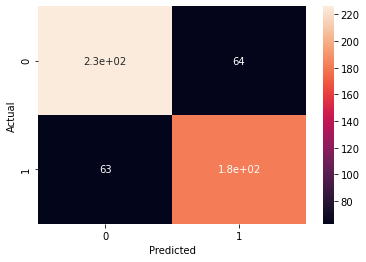

In [88]:
#Confusion Matrix

confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)
plt.show()

In [89]:
#Confusion Matrix - With changing Threshold

confusion_matrix = pd.crosstab(y_test, lr_proba_pred [:,1] >= 0.55, rownames=['Actual'], colnames=['Predicted'])
#sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)


Predicted  False  True 
Actual                 
0            236     54
1             71    174


#### ROC - AUC

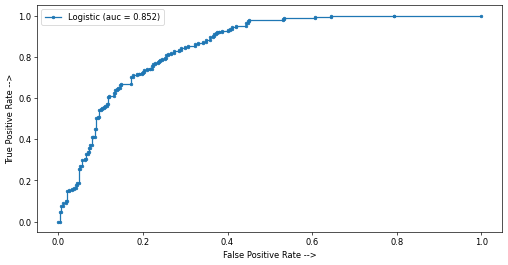

Default Area Under Cuve : Threshold = 0.5
Auc for our data is 0.761
Auc after using ROC_Curve is 0.852


In [90]:
from sklearn.metrics import roc_curve, auc, roc_auc_score 

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr,logistic_tpr)

plt.figure(figsize=(10,5), dpi=60)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()
auc = np.round(roc_auc_score(y_test, pred), 3) 
print('Default Area Under Cuve : Threshold = 0.5')
print("Auc for our data is {}". format(auc))
print('Auc after using ROC_Curve is 0.852')

---

### B - Decision Trees

In [91]:
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score

treeClass = tree.DecisionTreeClassifier(max_depth = 4)  
treeClass.fit(x_train, y_train)   #fitting our model
pred=treeClass.predict(x_test)   # evaluating our modelc
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy Score: 0.7588785046728972


0 age
1 hypertension
2 heart_disease
3 avg_glucose_level
4 bmi
5 gender_Male
6 ever_married_Yes
7 work_type_Govt_job
8 work_type_Never_worked
9 work_type_Private
10 work_type_Self-employed
11 Residence_type_Urban
12 smoking_status_never smoked
13 smoking_status_smokes


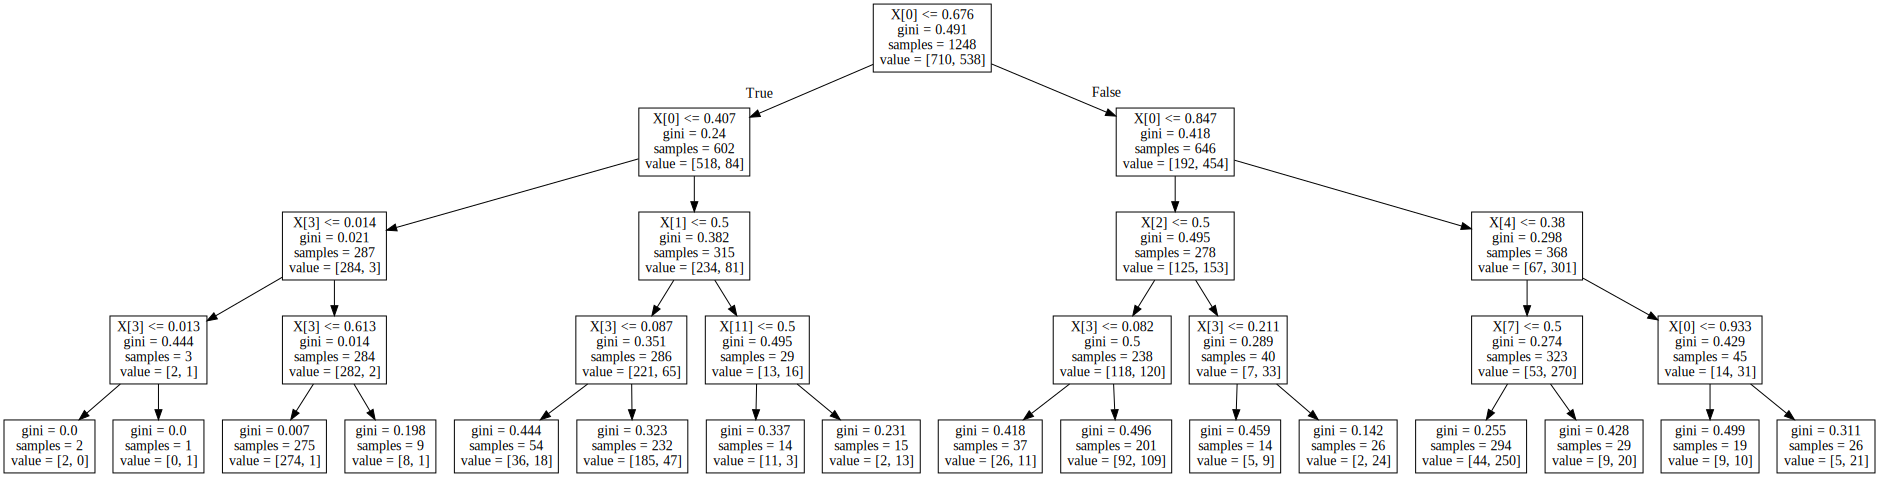

In [92]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(treeClass, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("data_frame")
for i in range(len(x.columns)):
        print(i, x.columns[i])
        
    
graph

---

#### Entropy

In [93]:
for i in range(1,11):
    treeClass = tree.DecisionTreeClassifier(criterion='entropy',max_depth = i, splitter='random')  
    treeClass.fit(x_train, y_train)   #fitting our model
    pred=treeClass.predict(x_test)   # evaluating our modelc
    print('Max_depth :', i, "--> Accuracy Score: {}".format(accuracy_score(y_test, pred)))


Max_depth : 1 --> Accuracy Score: 0.6242990654205608
Max_depth : 2 --> Accuracy Score: 0.7158878504672898
Max_depth : 3 --> Accuracy Score: 0.6691588785046729
Max_depth : 4 --> Accuracy Score: 0.7514018691588785
Max_depth : 5 --> Accuracy Score: 0.7626168224299066
Max_depth : 6 --> Accuracy Score: 0.719626168224299
Max_depth : 7 --> Accuracy Score: 0.7551401869158878
Max_depth : 8 --> Accuracy Score: 0.7420560747663552
Max_depth : 9 --> Accuracy Score: 0.7252336448598131
Max_depth : 10 --> Accuracy Score: 0.7233644859813084


- The highest accuracy scores is : Max_depth : 5 --> Accuracy Score: 0.7626168224299066

---

#### Gini Impurity

In [94]:
for i in range(1,11):
    treeClass = tree.DecisionTreeClassifier(criterion='gini',max_depth = i, splitter='random')  
    treeClass.fit(x_train, y_train)   #fitting our model
    pred=treeClass.predict(x_test)   # evaluating our modelc
    print('Max_depth :', i, "--> Accuracy Score: {}".format(accuracy_score(y_test, pred)))


Max_depth : 1 --> Accuracy Score: 0.6897196261682244
Max_depth : 2 --> Accuracy Score: 0.7289719626168224
Max_depth : 3 --> Accuracy Score: 0.7588785046728972
Max_depth : 4 --> Accuracy Score: 0.7607476635514019
Max_depth : 5 --> Accuracy Score: 0.7570093457943925
Max_depth : 6 --> Accuracy Score: 0.7383177570093458
Max_depth : 7 --> Accuracy Score: 0.7271028037383177
Max_depth : 8 --> Accuracy Score: 0.7289719626168224
Max_depth : 9 --> Accuracy Score: 0.7327102803738318
Max_depth : 10 --> Accuracy Score: 0.7289719626168224


- The highest accuracy scores is : Max_depth : 4 --> Accuracy Score: 0.7607476635514019

---

### C - Support Vector Machine

---

### 1 - Linear

In [95]:
from sklearn import svm
 
svm_classification = svm.SVC(kernel='linear', C=0.01) #build SVM classification model
svm_classification.fit(x_train,y_train) #fitting our model

y_svm_pred = svm_classification.predict(x_test)

Predicted    0    1
Actual             
0          249   41
1          117  128


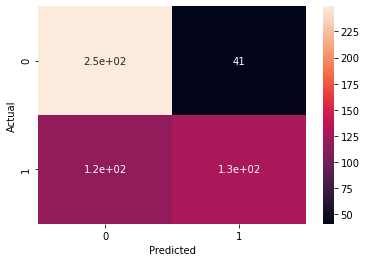

In [96]:
#Confusion Matrix

confusion_matrix = pd.crosstab(y_test, y_svm_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

In [97]:
#classification report
print(classification_report(y_test,y_svm_pred))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       290
           1       0.76      0.52      0.62       245

    accuracy                           0.70       535
   macro avg       0.72      0.69      0.69       535
weighted avg       0.72      0.70      0.69       535



### Grid Search - Hyper Parameter Tunning

In [98]:
from sklearn.model_selection import GridSearchCV

params = { 'C' : (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000)}

svm_classification_lin = svm.SVC(kernel='linear')
svm_grid = GridSearchCV(svm_classification_lin, params, n_jobs=-1, cv=13, verbose=1, scoring='accuracy')

svm_grid.fit(x_train,y_train)
svm_class_lin = svm_grid.best_estimator_
y_pred_svm = svm_class_lin.predict(x_test)

Fitting 13 folds for each of 13 candidates, totalling 169 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:   23.5s finished


In [99]:
#Best Parameter for C
svm_grid.best_params_

{'C': 50}

In [100]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       290
           1       0.73      0.75      0.74       245

    accuracy                           0.76       535
   macro avg       0.76      0.76      0.76       535
weighted avg       0.76      0.76      0.76       535



### Summary

- SVM - Linear Accuracy before Hyper Parameter Tunning = 0.70
- SVM - Linear Accuracy after Hyper Parameter Tunning = 0.76

---

### 2 - Polynomial

In [101]:
svm_classification = svm.SVC(kernel='poly',degree= 2, C=0.01) #build SVM classification model
svm_classification.fit(x_train,y_train) #fitting our model

y_svm_pred = svm_classification.predict(x_test)

Predicted    0    1
Actual             
0          253   37
1          133  112


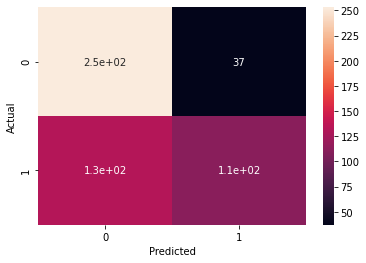

In [102]:
#Confusion Matrix

confusion_matrix = pd.crosstab(y_test, y_svm_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

In [103]:
#classification report
print(classification_report(y_test,y_svm_pred))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       290
           1       0.75      0.46      0.57       245

    accuracy                           0.68       535
   macro avg       0.70      0.66      0.66       535
weighted avg       0.70      0.68      0.67       535



### Grid Search - Hyper Parameter Tunning

In [104]:
params = { 'C' : (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000),
           'degree' : (2,3,4,5,6)}

svm_classification_poly = svm.SVC(kernel='poly')
svm_grid_poly = GridSearchCV(svm_classification_poly, params, n_jobs=-1, cv=13, verbose=1, scoring='accuracy')

svm_grid_poly.fit(x_train,y_train)
svm_class_poly = svm_grid_poly.best_estimator_
y_pred_svm = svm_class_poly.predict(x_test)

Fitting 13 folds for each of 65 candidates, totalling 845 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 746 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 845 out of 845 | elapsed:  4.3min finished


In [105]:
#Best Parameter 
svm_grid_poly.best_params_

{'C': 0.1, 'degree': 2}

In [106]:
#classification report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       290
           1       0.76      0.77      0.77       245

    accuracy                           0.79       535
   macro avg       0.78      0.78      0.78       535
weighted avg       0.79      0.79      0.79       535



### Summary

- SVM - Polynomial Accuracy before Hyper Parameter Tunning = 0.68
- SVM - Polynomial Accuracy after Hyper Parameter Tunning = 0.79

---

### 3 - Radial

---

In [107]:
svm_classification = svm.SVC(kernel='rbf',gamma= 0.5, C=10) #build SVM classification model
svm_classification.fit(x_train,y_train) #fitting our model

y_svm_pred = svm_classification.predict(x_test)

Predicted    0    1
Actual             
0          217   73
1           62  183


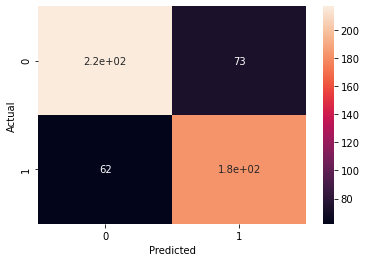

In [108]:
#Confusion Matrix

confusion_matrix = pd.crosstab(y_test, y_svm_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

In [109]:
#classification report
print(classification_report(y_test,y_svm_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       290
           1       0.71      0.75      0.73       245

    accuracy                           0.75       535
   macro avg       0.75      0.75      0.75       535
weighted avg       0.75      0.75      0.75       535



### Grid Search - Hyper Parameter Tunning

In [110]:
params = { 'C' : (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100),
           'gamma' : (0.001, 0.01, 0.1, 0.5, 1)}

svm_classification_radial = svm.SVC(kernel='rbf')
svm_grid_radial = GridSearchCV(svm_classification_radial, params, n_jobs=-1, cv=13, verbose=1, scoring='accuracy')

svm_grid_radial.fit(x_train,y_train)
svm_class_radial = svm_grid_radial.best_estimator_
y_pred_svm = svm_class_radial.predict(x_test)

Fitting 13 folds for each of 55 candidates, totalling 715 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 708 out of 715 | elapsed:   16.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 715 out of 715 | elapsed:   16.8s finished


In [111]:
#Best Parameter 
svm_grid_radial.best_params_

{'C': 100, 'gamma': 0.001}

In [112]:
#classification report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       290
           1       0.73      0.78      0.75       245

    accuracy                           0.77       535
   macro avg       0.77      0.77      0.77       535
weighted avg       0.77      0.77      0.77       535



### Summary

- SVM - Radial Accuracy before Hyper Parameter Tunning = 0.75
- SVM - Radial Accuracy after Hyper Parameter Tunning = 0.77

---

### D - Naive Bayes

In [113]:
from sklearn.naive_bayes import GaussianNB 


gnb = GaussianNB() #Create a Gaussian Classifier
gnb.fit(x_train,y_train) #Train the model using the training sets
y_pred = gnb.predict(x_test) #Predict the response for test dataset

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6242990654205608


---

## Solution 2 

#####      Splitting dataset into a training set and a testing set

In [114]:
#features extraction

x = new_data_frame.drop(['stroke', 'gender_Male', 'Residence_type_Urban'] , axis=1)
y = new_data_frame['stroke']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20) 

### A - Logistic Regression

In [115]:

model = LogisticRegression(solver='newton-cg') #build Logistic regression model
model.fit(x_train,y_train) #fitting the training data
pred=model.predict(x_test) #testing our model’s performance
y_pred_logistic = model.decision_function(x_test)

print(classification_report(y_test,pred))
lr_proba_pred = model.predict_proba(x_test)


              precision    recall  f1-score   support

           0       0.79      0.78      0.78       290
           1       0.74      0.75      0.75       245

    accuracy                           0.77       535
   macro avg       0.76      0.76      0.76       535
weighted avg       0.77      0.77      0.77       535



Predicted    0    1
Actual             
0          227   63
1           62  183


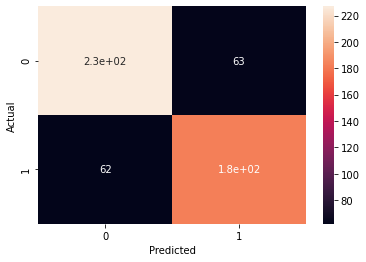

In [116]:
#Confusion Matrix

confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)
plt.show()

In [117]:
#Confusion Matrix - With changing Threshold

confusion_matrix = pd.crosstab(y_test, lr_proba_pred [:,1] >= 0.55, rownames=['Actual'], colnames=['Predicted'])
#sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

Predicted  False  True 
Actual                 
0            238     52
1             70    175


---

### B - Decision Trees

In [118]:
treeClass = tree.DecisionTreeClassifier(max_depth = 4)  
treeClass.fit(x_train, y_train)   #fitting our model
pred=treeClass.predict(x_test)   # evaluating our modelc
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy Score: 0.7551401869158878


#### Entropy

In [119]:
for i in range(1,11):
    treeClass = tree.DecisionTreeClassifier(criterion='entropy',max_depth = i, splitter='random')  
    treeClass.fit(x_train, y_train)   #fitting our model
    pred=treeClass.predict(x_test)   # evaluating our modelc
    print('Max_depth :', i, "--> Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Max_depth : 1 --> Accuracy Score: 0.7420560747663552
Max_depth : 2 --> Accuracy Score: 0.7476635514018691
Max_depth : 3 --> Accuracy Score: 0.7626168224299066
Max_depth : 4 --> Accuracy Score: 0.7514018691588785
Max_depth : 5 --> Accuracy Score: 0.7401869158878505
Max_depth : 6 --> Accuracy Score: 0.7289719626168224
Max_depth : 7 --> Accuracy Score: 0.7439252336448599
Max_depth : 8 --> Accuracy Score: 0.7439252336448599
Max_depth : 9 --> Accuracy Score: 0.7401869158878505
Max_depth : 10 --> Accuracy Score: 0.7383177570093458


- The highest accuracy scores is : Max_depth : 3 --> Accuracy Score: 0.7626168224299066

---

#### Gini Impurity

In [120]:
for i in range(1,11):
    treeClass = tree.DecisionTreeClassifier(criterion='gini',max_depth = i, splitter='random')  
    treeClass.fit(x_train, y_train)   #fitting our model
    pred=treeClass.predict(x_test)   # evaluating our modelc
    print('Max_depth :', i, "--> Accuracy Score: {}".format(accuracy_score(y_test, pred)))


Max_depth : 1 --> Accuracy Score: 0.6373831775700934
Max_depth : 2 --> Accuracy Score: 0.7570093457943925
Max_depth : 3 --> Accuracy Score: 0.6990654205607477
Max_depth : 4 --> Accuracy Score: 0.7551401869158878
Max_depth : 5 --> Accuracy Score: 0.7532710280373832
Max_depth : 6 --> Accuracy Score: 0.7233644859813084
Max_depth : 7 --> Accuracy Score: 0.7271028037383177
Max_depth : 8 --> Accuracy Score: 0.7345794392523365
Max_depth : 9 --> Accuracy Score: 0.7345794392523365
Max_depth : 10 --> Accuracy Score: 0.7327102803738318


- The highest accuracy scores is : Max_depth : 2 --> Accuracy Score: 0.7570093457943925

---

### C - Support Vector Machine

### 1 - Linear

In [121]:
svm_classification = svm.SVC(kernel='linear', C=0.01) #build SVM classification model
svm_classification.fit(x_train,y_train) #fitting our model

y_svm_pred = svm_classification.predict(x_test)

Predicted    0    1
Actual             
0          248   42
1          119  126


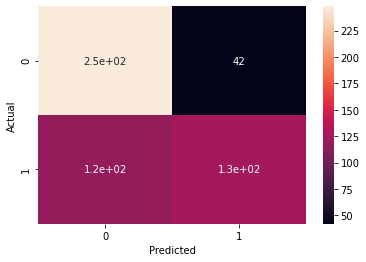

In [122]:
#Confusion Matrix

confusion_matrix = pd.crosstab(y_test, y_svm_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

In [123]:
#classification report
print(classification_report(y_test,y_svm_pred))

              precision    recall  f1-score   support

           0       0.68      0.86      0.75       290
           1       0.75      0.51      0.61       245

    accuracy                           0.70       535
   macro avg       0.71      0.68      0.68       535
weighted avg       0.71      0.70      0.69       535



### Grid Search - Hyper Parameter Tunning

In [124]:
from sklearn.model_selection import GridSearchCV

params = { 'C' : (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000)}

svm_classification_lin = svm.SVC(kernel='linear')
svm_grid = GridSearchCV(svm_classification_lin, params, n_jobs=-1, cv=13, verbose=1, scoring='accuracy')

svm_grid.fit(x_train,y_train)
svm_class_lin = svm_grid.best_estimator_
y_pred_svm = svm_class_lin.predict(x_test)

Fitting 13 folds for each of 13 candidates, totalling 169 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 169 out of 169 | elapsed:    9.9s finished


In [125]:
#Best Parameter for C
svm_grid.best_params_

{'C': 50}

In [126]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       290
           1       0.74      0.76      0.75       245

    accuracy                           0.77       535
   macro avg       0.77      0.77      0.77       535
weighted avg       0.77      0.77      0.77       535



### Summary

- SVM - Linear Accuracy before Hyper Parameter Tunning = 0.70
- SVM - Linear Accuracy after Hyper Parameter Tunning = 0.77

---

### 2 - Polynomial

In [127]:
svm_classification = svm.SVC(kernel='poly',degree= 2, C=0.01) #build SVM classification model
svm_classification.fit(x_train,y_train) #fitting our model

y_svm_pred = svm_classification.predict(x_test)

Predicted    0    1
Actual             
0          251   39
1          123  122


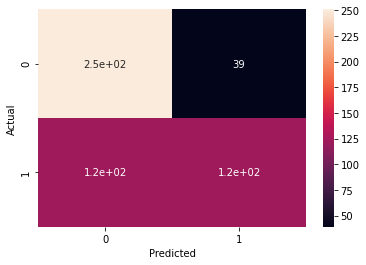

In [128]:
#Confusion Matrix

confusion_matrix = pd.crosstab(y_test, y_svm_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

In [129]:
#classification report
print(classification_report(y_test,y_svm_pred))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76       290
           1       0.76      0.50      0.60       245

    accuracy                           0.70       535
   macro avg       0.71      0.68      0.68       535
weighted avg       0.71      0.70      0.69       535



### Grid Search - Hyper Parameter Tunning

In [130]:
params = { 'C' : (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000),
           'degree' : (2,3,4,5,6)}

svm_classification_poly = svm.SVC(kernel='poly')
svm_grid_poly = GridSearchCV(svm_classification_poly, params, n_jobs=-1, cv=13, verbose=1, scoring='accuracy')

svm_grid_poly.fit(x_train,y_train)
svm_class_poly = svm_grid_poly.best_estimator_
y_pred_svm = svm_class_poly.predict(x_test)

Fitting 13 folds for each of 65 candidates, totalling 845 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 766 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 845 out of 845 | elapsed:  4.3min finished


In [131]:
#Best Parameter 
svm_grid_poly.best_params_

{'C': 50, 'degree': 2}

In [132]:
#classification report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       290
           1       0.73      0.74      0.73       245

    accuracy                           0.75       535
   macro avg       0.75      0.75      0.75       535
weighted avg       0.75      0.75      0.75       535



### Summary

- SVM - Polynomial Accuracy before Hyper Parameter Tunning = 0.70
- SVM - Polynomial Accuracy after Hyper Parameter Tunning = 0.75

---

### 3 - Radial

In [133]:
svm_classification = svm.SVC(kernel='rbf',gamma= 0.5, C=10) #build SVM classification model
svm_classification.fit(x_train,y_train) #fitting our model

y_svm_pred = svm_classification.predict(x_test)

Predicted    0    1
Actual             
0          223   67
1           59  186


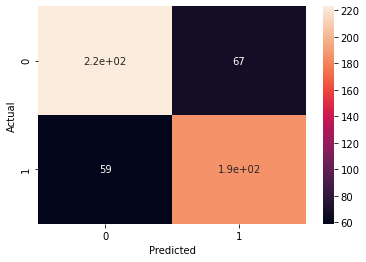

In [134]:
#Confusion Matrix

confusion_matrix = pd.crosstab(y_test, y_svm_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(confusion_matrix)

In [135]:
#classification report
print(classification_report(y_test,y_svm_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       290
           1       0.74      0.76      0.75       245

    accuracy                           0.76       535
   macro avg       0.76      0.76      0.76       535
weighted avg       0.77      0.76      0.76       535



### Grid Search - Hyper Parameter Tunning

In [136]:
params = { 'C' : (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100),
           'gamma' : (0.001, 0.01, 0.1, 0.5, 1)}

svm_classification_radial = svm.SVC(kernel='rbf')
svm_grid_radial = GridSearchCV(svm_classification_radial, params, n_jobs=-1, cv=13, verbose=1, scoring='accuracy')

svm_grid_radial.fit(x_train,y_train)
svm_class_radial = svm_grid_radial.best_estimator_
y_pred_svm = svm_class_radial.predict(x_test)

Fitting 13 folds for each of 55 candidates, totalling 715 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 708 out of 715 | elapsed:   15.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 715 out of 715 | elapsed:   15.5s finished


In [137]:
#Best Parameter 
svm_grid_radial.best_params_

{'C': 5, 'gamma': 0.01}

In [138]:
#classification report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       290
           1       0.74      0.78      0.76       245

    accuracy                           0.77       535
   macro avg       0.77      0.77      0.77       535
weighted avg       0.77      0.77      0.77       535



### Summary

- SVM - Radial Accuracy before Hyper Parameter Tunning = 0.76
- SVM - Radial Accuracy after Hyper Parameter Tunning = 0.77

---

### D - Naive Bayes

In [140]:
gnb = GaussianNB() #Create a Gaussian Classifier
gnb.fit(x_train,y_train) #Train the model using the training sets
y_pred = gnb.predict(x_test) #Predict the response for test dataset

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6242990654205608


---

## Summarize

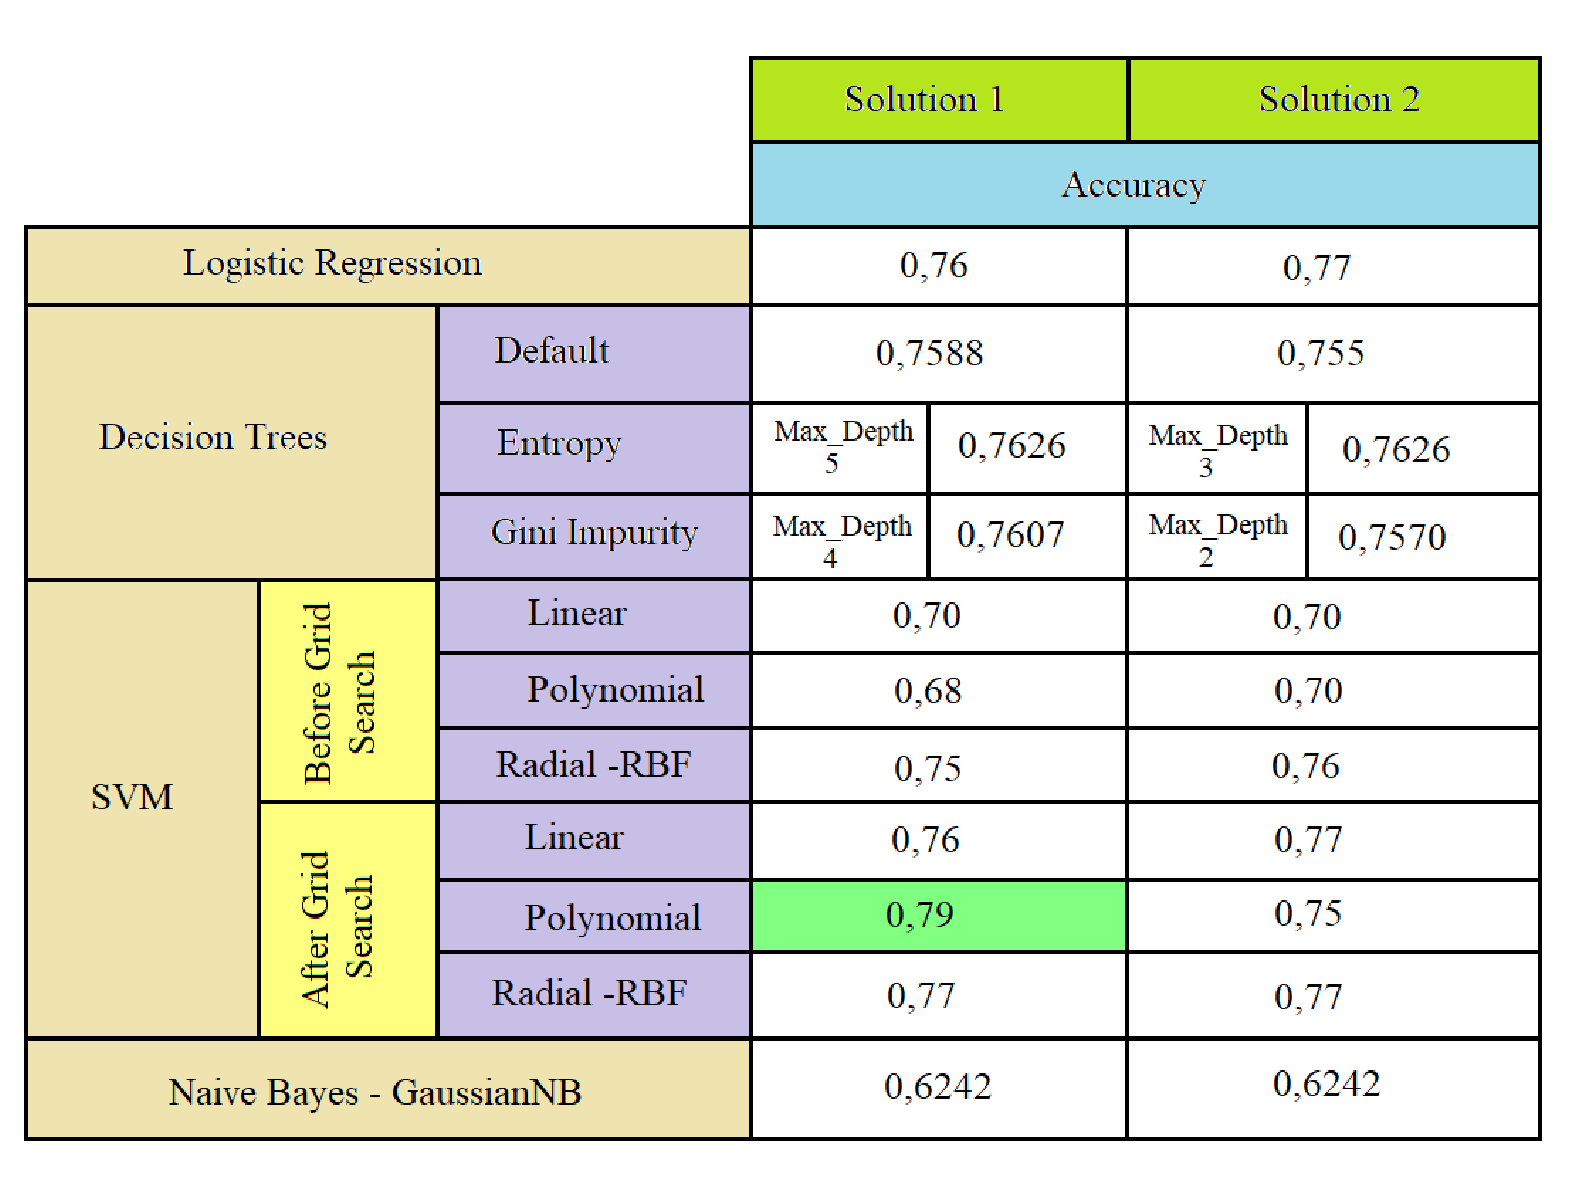

- We can conclude that the best model with high accuracy= 0,79 is Support Vector Machine After High parameter Tunning. 